<a href="https://colab.research.google.com/github/Ash100/MDS/blob/main/E_landscap_SSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Landscape (simple projection using RMSD vs RoG)
Generated by Dr. Ashfaq Ahmad

In [ ]:
# Mount Google Drive to access your files
# This will prompt you to authorize Colab to access your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#@title Optional
!pip install notebook==6.5.7 jupyter-client==7.4.9


In [ ]:
!pip install MDAnalysis nglview matplotlib

In [8]:
# --- Cell 2: Define File Paths and Load Trajectory ---
import MDAnalysis as mda

# Replace with your actual file paths
pdb_path = "/content/drive/MyDrive/Zia_Zohaib/3wa4/prot_lig_equil.pdb"  # Replace with your PDB file path
dcd_path = "/content/drive/MyDrive/Zia_Zohaib/3wa4/prot_lig_prod1-10_whole.dcd"  # Replace with your DCD file path

u = mda.Universe(pdb_path, dcd_path)


/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [ ]:
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms

# RMSD Calculation
R = rms.RMSD(u, u, select="protein and name CA")
R.run()

plt.plot(R.rmsd[:,1], R.rmsd[:,2])
plt.xlabel('Frame')
plt.ylabel('RMSD (Å)')
plt.title('RMSD over Time')
plt.grid(True)
plt.show()

# Radius of Gyration Calculation
rog = []
protein = u.select_atoms("protein")

for ts in u.trajectory:
    rog.append(protein.radius_of_gyration())

plt.plot(rog)
plt.xlabel("Frame")
plt.ylabel("Radius of Gyration (Å)")
plt.title("Radius of Gyration over Time")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Frame numbers
frames = np.arange(len(R.rmsd[:,2]))

# RMSD values
RMSD_vals = R.rmsd[:,2]

# Radius of Gyration
RoG_vals = rog  # make sure 'rog' list was computed as before

# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RMSD_vals, RoG_vals, frames, c=frames, cmap='plasma', s=30)
ax.set_xlabel("RMSD (Å)")
ax.set_ylabel("Radius of Gyration (Å)")
ax.set_zlabel("Frame Index")
ax.set_title("3D Energy Landscape Projection")
plt.show()

plt.show()
fig.savefig("3wa4_energy_landscape_3d.png", dpi=600, bbox_inches=None)




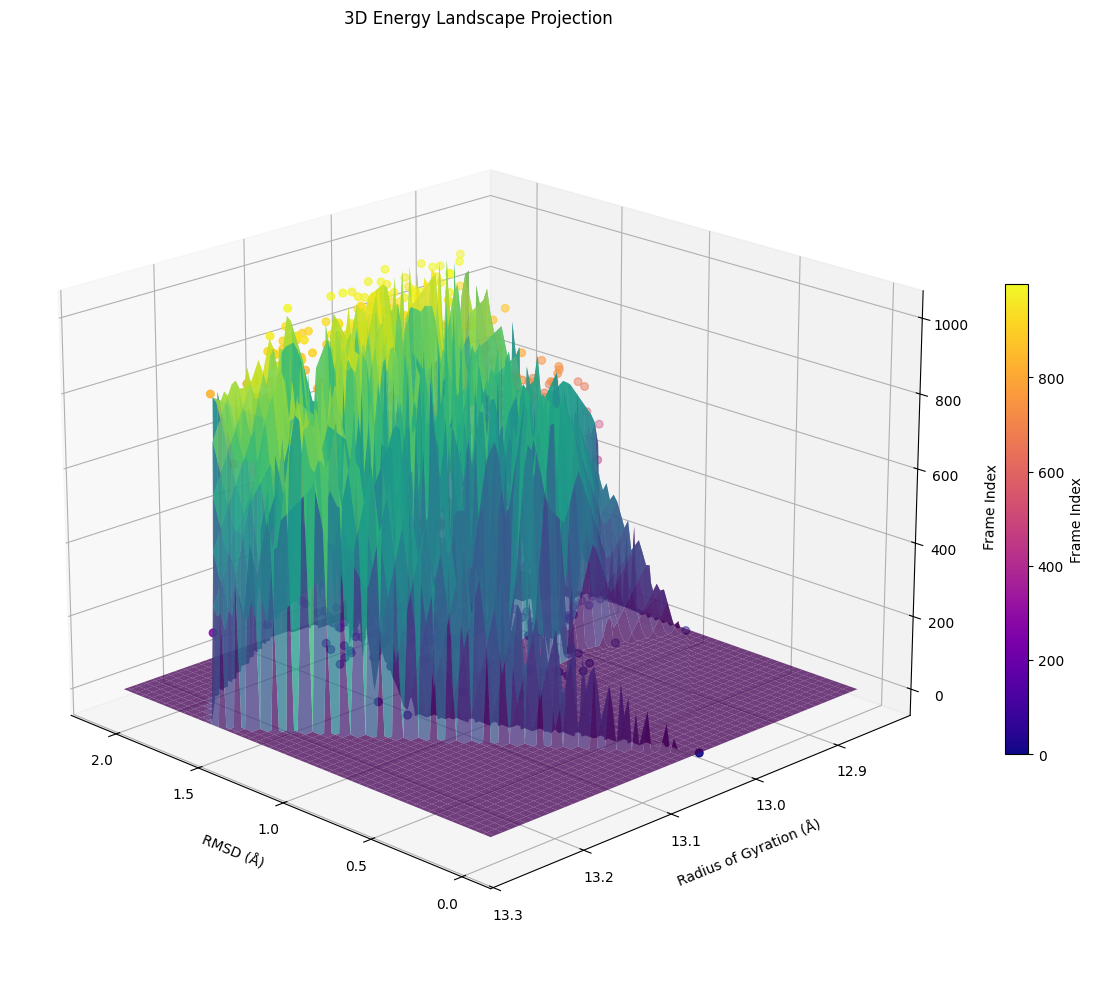

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Prepare data
frames = np.arange(len(R.rmsd[:, 2]))           # Frame index
RMSD_vals = R.rmsd[:, 2]                        # RMSD values
RoG_vals = rog                                  # Radius of Gyration

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# === Scatter Plot ===
sc = ax.scatter(RMSD_vals, RoG_vals, frames, c=frames, cmap='plasma', s=30, label='Trajectory Points')

# === Surface Interpolation ===
# Define grid
xi = np.linspace(min(RMSD_vals), max(RMSD_vals), 100)
yi = np.linspace(min(RoG_vals), max(RoG_vals), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate frame indices onto grid
zi = griddata((RMSD_vals, RoG_vals), frames, (xi, yi), method='linear')

# Clean up interpolation artifacts
zi = np.where(np.isnan(zi), 0, zi)              # Replace NaNs with 0
zi = np.clip(zi, 0, len(frames)-1)              # Clamp negative values

# Plot interpolated surface
surf = ax.plot_surface(xi, yi, zi, cmap="viridis", edgecolor='none', alpha=0.75)

# === Axis Settings ===
ax.set_xlabel("RMSD (Å)", labelpad=10)
ax.set_ylabel("Radius of Gyration (Å)", labelpad=10)
ax.set_zlabel("Frame Index", labelpad=10)
ax.set_title("3D Energy Landscape Projection", pad=20)
ax.view_init(elev=20, azim=135)

# === Color Bar and Legend ===
fig.colorbar(sc, ax=ax, shrink=0.5, label="Frame Index")

# === Save Plot ===
plt.tight_layout()
fig.savefig("3wa4_energy_landscape_sheet_clean.png", dpi=600)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(frames, RMSD_vals, label='RMSD', color='teal')
plt.plot(frames, RoG_vals, label='RoG', color='orange')
plt.xlabel("Frame Index")
plt.ylabel("Ångström")
plt.title("RMSD and RoG Evolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rmsd_rog_line_plot.png", dpi=600)
plt.show()


In [ ]:
!apt-get update
!apt-get install dssp


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract DSSP codes (shape: frames × residues)
ss_array = dssp.results['dssp']

# Map DSSP codes to numeric values: Coil=0, Helix=1, Sheet=2
code_map = {'H': 1, 'G': 1, 'I': 1,    # Helix types
            'E': 2, 'B': 2,            # Sheet types
            'T': 0, 'S': 0, 'C': 0, '-': 0}  # Coil/turn/bend/undefined

ss_numeric = np.array([[code_map.get(code, -1) for code in row] for row in ss_array])

# Plot as heatmap
plt.figure(figsize=(15, 6))
plt.imshow(ss_numeric, aspect='auto', cmap='viridis', interpolation='none')
plt.xlabel("Residue Index")
plt.ylabel("Frame Index")
plt.title("Secondary Structure Evolution Over Time (DSSP)")
plt.colorbar(label="Structure Code: Coil=0, Helix=1, Sheet=2")
plt.tight_layout()
plt.savefig("secondary_structure_timeline_final.png", dpi=300)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Prepare DSSP matrix ===
ss_array = dssp.results['dssp']  # Shape: [frames × residues]

# Map DSSP codes to numeric structure types
code_map = {'H': 1, 'G': 1, 'I': 1,    # α-, 3_10-, π-helices
            'E': 2, 'B': 2,            # β-strands/sheets
            'T': 0, 'S': 0, 'C': 0, '-': 0}  # Coil / turns / undefined

ss_numeric = np.array([[code_map.get(code, -1) for code in row] for row in ss_array])

# === Configure plot aesthetics ===
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Heatmap with custom colormap
cmap = sns.color_palette(["#aaaaaa", "#1f77b4", "#d62728"])  # coil=gray, helix=blue, sheet=red
sns.heatmap(ss_numeric.T, cmap=cmap, cbar_kws={"label": "Structure Type"}, xticklabels=50, yticklabels=10)

# Axis labels and titles
plt.xlabel("Frame Index", fontsize=14)
plt.ylabel("Residue Index", fontsize=14)
plt.title("🧬 Secondary Structure Dynamics Over Time", fontsize=16, pad=15)

# Optional: mark domains or motifs
# domain_ranges = [(5, 20), (40, 60)]  # example: helix1 and sheet2
# for start, end in domain_ranges:
#     plt.axhspan(start, end, color='yellow', alpha=0.3)

plt.tight_layout()
plt.savefig("secondary_structure_annotated_heatmap.png", dpi=400)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# DSSP output: ss_array shape → frames × residues
ss_array = dssp.results['dssp']

# Map DSSP codes to structure types
code_map = {'H': 1, 'G': 1, 'I': 1,     # Helices
            'E': 2, 'B': 2,             # Sheets
            'T': 0, 'S': 0, 'C': 0, '-': 0}  # Coils and undefined

ss_numeric = np.array([[code_map.get(code, -1) for code in row] for row in ss_array])

# Transpose: residues (y-axis), time (x-axis)
ss_numeric_T = ss_numeric.T

# Custom color map: coil=gray, helix=blue, sheet=red
cmap = sns.color_palette(["#aaaaaa", "#1f77b4", "#d62728"])

# Configure time labels in ns
frame_count = ss_numeric.shape[0]
ns_labels = [int(i*0.1) for i in range(frame_count)]   # Convert frames to ns
xticks = np.linspace(0, frame_count-1, 11, dtype=int)  # 0, 100, 200, ..., 1000 frames
xticklabels = [str(ns_labels[i]) for i in xticks]      # 0, 10, 20, ..., 100 ns

# Plot
sns.set(style="white")
plt.figure(figsize=(16, 8))
ax = sns.heatmap(ss_numeric_T, cmap=cmap, cbar=False)

# Axis labels
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("Residue Index", fontsize=14)
plt.title("🧬 Secondary Structure Evolution Over Time", fontsize=16, pad=15)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)

# Create custom legend
legend_elements = [
    Patch(facecolor="#aaaaaa", edgecolor='k', label="Coil"),
    Patch(facecolor="#1f77b4", edgecolor='k', label="Helix"),
    Patch(facecolor="#d62728", edgecolor='k', label="Sheet")
]
plt.legend(handles=legend_elements, title="Structure Type", bbox_to_anchor=(1.03, 1), loc="upper left", fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.savefig("secondary_structure_timeline_ns_labeled.png", dpi=400)
plt.show()
